Este ejemplo muestra, con Keras y Tensorflow, cómo entrenar un modelo definido por nosotros con datos descargados desde la librería Keras.

In [1]:
! pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 2.9 MB 36.0 MB/s 
     |████████████████████████████████| 462 kB 46.7 MB/s 
     |████████████████████████████████| 3.8 MB 33.7 MB/s 
     |████████████████████████████████| 132 kB 45.9 MB/s 
     |████████████████████████████████| 14.8 MB 35.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68710 sha256=525abf6a98715947a5681e7e9aab62a6373e30d8311d794d3334bf3d707c4737
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  A

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import os
import random

Inicializamos con una semilla los generadores de números aleatorios, para hacer replicables los resultados:

In [3]:
theSEED = 232323
tf.random.set_seed(theSEED)
np.random.seed(theSEED)
random.seed(theSEED)

Decargamos el dataset con la librería Keras:

In [4]:
mnist = tf.keras.datasets.fashion_mnist

Cargamos el dataset localmente:

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
x_train[0].shape

(28, 28)

Vamos a visualizar una de las muestras y la clase a la que pertenece:

5


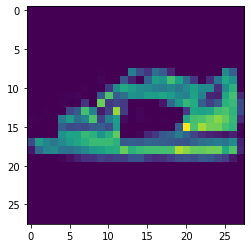

In [9]:
n=13
plt.imshow(x_train[n])
print(y_train[n])

Normalizamos las imágenes para que estén entre los valores 0 y 1:

In [11]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

60000

In [18]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [20]:
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [12]:
# Hiperparámetros: parámetros no optimizables por el algoritmo de retropropagación
# Suelen fijarse mediante ensayo y error y mediante experiencia

NB_EPOCH = 10#100       # numero de epocas de entrenamiento
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

Definiremos un modelo muy simple con una capa Flatten (para convertir la imagen, con forma de matriz, en un array unidimensional) y dos capas Dense, o Fully-Connected.

Compilamos el modelo indicando su optimizador, función de loss y métrica, e iniciamos el entrenamiento.

In [ ]:
# API functional
# inputs = tf.keras.layers.Input(shape=(28, 28))
# model = tf.keras.layers.Flatten()(inputs)
# model = tf.keras.layers.Dense(512, activation=tf.nn.relu)(model)
# model = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(model)

# model = keras.Model(inputs=inputs, outputs=model)

In [23]:
# API sequential

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16, (3,3),activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=VALIDATION_SPLIT)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5699 - accuracy: 0.8028 - val_loss: 0.3101 - val_accuracy: 0.8851
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2641 - accuracy: 0.9025 - val_loss: 0.2829 - val_accuracy: 0.8947
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2019 - accuracy: 0.9249 - val_loss: 0.2734 - val_accuracy: 0.9059
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1467 - accuracy: 0.9452 - val_loss: 0.2641 - val_accuracy: 0.9126
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1056 - accuracy: 0.9609 - val_loss: 0.2913 - val_accuracy: 0.9087
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0749 - accuracy: 0.9728 - val_loss: 0.3252 - val_accuracy: 0.9078
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0568 - accuracy: 0.9798 - val_loss: 0.3795 - val_accura

Con el conjunto de test, evaluamos el modelo entrenado:

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5102 - accuracy: 0.8915


[0.5102270245552063, 0.8914999961853027]

Con las siguientes gráficas podemos concluir que el modelo entrenado sufre de overfitting:

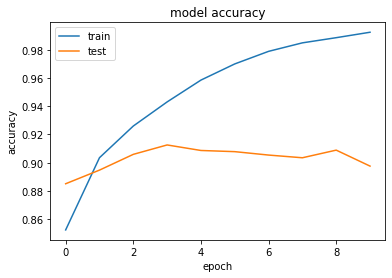

In [27]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

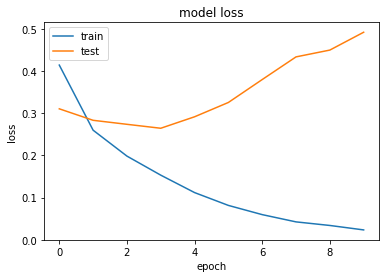

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [30]:
!mkdir -p '/content/gdrive/MyDrive/Curso-Jetson/models'

In [31]:
OUT_MODEL_PATH= '/content/gdrive/MyDrive/Curso-Jetson/models'
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1.hdf5'))
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1'))

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Curso-Jetson/models/model-final-pract1/assets


In [32]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/models'

model-final-pract1  model-final-pract1.hdf5
